# Homework 3 Part 2

This is an individual assignment.

---

You can utilize any off-the-shelf libraries for code implementations in this assignment.

---

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import cv2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

---

# Problem 1 (45 points)

**In this problem you will be working with the [handwritten digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) from ```scikit-learn```. The dataset contains 1797 samples. Each sample is a 64-dimensional vector representing all pixels of a $8\times 8$ grayscale image of a handwritten digit. There are a total of 10 digits (10 targets) and about 180 images per digit. Let's load the data:**

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(return_X_y=False)

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
X = digits.data # training data
t = digits.target # target values

X.shape, t.shape

((1797, 64), (1797,))

**Each image can be reshaped as a $8\times 8$ grayscale image and plotted:**

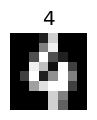

In [4]:
img_no = 100

plt.figure(figsize=(1,1))
plt.imshow(X[img_no,:].reshape(8,8), cmap='gray')
plt.title(t[img_no]) # insert title with the label
plt.axis('off');

**Here's some image examples from all 10 classes:**

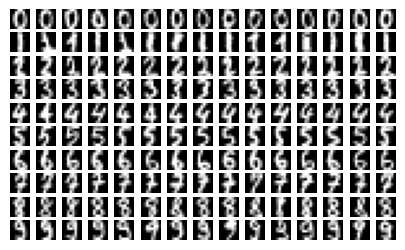

In [5]:
plt.figure(figsize=(5,3))
grid=1
for j in range(10):
    loc = np.where(t==j)[0]
    idx_rd = np.random.choice(loc,15,replace=False)
    for i in range(15):
        plt.subplot(10,15,grid)
        plt.imshow(X[idx_rd[i],:].reshape(8,8), cmap='gray')
        plt.axis('off')
        grid+=1

**Start by partitioning the data into training and test sets with a 80-20 stratified split (fix random number generator for reproducibility).**

**Build a script that (1) extracts the Hu moments for each image, and (2) train a Naive Bayes classifier with single-Gaussian density functions (whose parameters are estimated with MLE).**

**Report accuracy scores in training and test sets. Compare your results with the outcomes from HW2-P2.**

In [6]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2,
                                                    stratify=t,
                                                    random_state=0)

X_train.shape, X_test.shape, t_train.shape, t_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [7]:
priors = np.array([sum(t_train==i)/len(t_train) for i in range(10)])
priors

array([0.09881698, 0.10160056, 0.09881698, 0.10160056, 0.10090466,
       0.10090466, 0.10090466, 0.09951287, 0.0967293 , 0.10020877])

In [8]:
# Calculate Hu moments
def huMoments(image, thresh, display=False):
    # Otsu's threshold
    _, img_binary = cv2.threshold(image, thresh, 1, cv2.THRESH_BINARY)
    img_binary = img_binary.astype(np.uint8)
    
    # Calculate Moments 
    moments = cv2.moments(img_binary)
    # Calculate Hu Moments 
    huMoments = cv2.HuMoments(moments)+1e-15
    
    # Log scale hu moments 
    for i in range(7):
        huMoments[i] = -1*np.sign(huMoments[i]) * np.log10(abs(huMoments[i]))
        
    if display:
        plt.imshow(img_binary, cmap='gray')
        print('Hu Moments:',huMoments)
        
    return huMoments


HuMoments_train= []
for i in range(X_train.shape[0]):
    image1 = X_train[i,:].reshape(8,8)
    hum1=huMoments(image1, 0.3)
    HuMoments_train.append(np.squeeze(hum1))

In [9]:
# Fit Classifier
clf = GaussianNB(priors=priors)
clf.fit(HuMoments_train, t_train)

GaussianNB(priors=array([0.09881698, 0.10160056, 0.09881698, 0.10160056, 0.10090466,
       0.10090466, 0.10090466, 0.09951287, 0.0967293 , 0.10020877]))

In [10]:
HuMoments_test= []
for i in range(X_test.shape[0]):
    image1 = X_test[i,:].reshape(8,8)
    hum1=huMoments(image1, 0.3)
    HuMoments_test.append(np.squeeze(hum1))

In [11]:
y_train = clf.predict(HuMoments_train)
y_test = clf.predict(HuMoments_test)

print('Training Accuracy: ',accuracy_score(t_train, y_train))
print('Testing Accuracy: ',accuracy_score(t_test, y_test))


Training Accuracy:  0.4349338900487126
Testing Accuracy:  0.4111111111111111


The accuracy in test is ~43% accuracy with the Hu Moments, which is much worse than 94% in homework 2 with 10 multivariate Gaussians with MLE. 

---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___